In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\afuen\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [15]:
# Read your api key environment variable
load_dotenv()

True

In [16]:
api_key = os.getenv("news_api_key")

In [17]:
type(api_key)

str

In [18]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [20]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(
    q="bitcoin",
    language="en"
)

# Show the total number of news
bitcoin_news_en["totalResults"]

6558

In [21]:
# Fetch the Ethereum news articles
ethereum_news_en = newsapi.get_everything(
    q="Ethereum",
    language="en"
)

# Show the total number of news
ethereum_news_en["totalResults"]

2958

In [22]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2021-08-06,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939
1,2021-08-23,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.000,0.902
2,2021-08-10,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,0.4019,0.080,0.000,0.920
3,2021-08-19,Retailers are increasingly accepting cryptocur...,0.6187,0.153,0.000,0.847
4,2021-08-23,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.000,0.839


In [23]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-07-29,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939
1,2021-08-05,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.000,0.810
2,2021-08-23,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.000,0.902
3,2021-08-10,"After the bell today, Coinbase reported anothe...",0.5719,0.139,0.000,0.861
4,2021-08-23,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.000,0.839


In [24]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.162885,0.071100,0.033500,0.895400
std,0.447308,0.065972,0.068998,0.071897
min,-0.886000,0.000000,0.000000,0.729000
25%,0.000000,0.000000,0.000000,0.846000
50%,0.138950,0.066500,0.000000,0.904500
75%,0.525925,0.108250,0.043000,0.924750
max,0.718400,0.200000,0.271000,1.000000


In [25]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.148395,0.055800,0.013850,0.930300
std,0.320766,0.062553,0.029745,0.060608
min,-0.440400,0.000000,0.000000,0.810000
25%,0.000000,0.000000,0.000000,0.892500
50%,0.113150,0.049000,0.000000,0.935500
75%,0.344025,0.095000,0.000000,1.000000
max,0.695600,0.190000,0.094000,1.000000


In [26]:
btc_positive_mean=round(bitcoin_df.positive.mean(),3)
eth_positive_mean=round(ethereum_df.positive.mean(),3)
btc_compound_mean=round(bitcoin_df.compound.mean(),3)
eth_compound_mean=round(ethereum_df.compound.mean(),3)
btc_compound_max=round(bitcoin_df.compound.max(),3)
eth_compound_max=round(ethereum_df.compound.max(),3)
btc_positive_max=round(bitcoin_df.positive.max(),3)
eth_positive_max=round(ethereum_df.positive.max(),3)

In [ ]:
Q: Which coin had the highest mean positive score?
    A: Bitcoin, .0711
Q: Which coin had the highest compound score?
    A: Bitcoin, at .718
Q. Which coin had the highest positive score?
    A: Bitcoin, at .20

In [27]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [30]:
# First, print default list if stopwords:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [31]:
#Instantiate the lemmatizer 
lemmatizer = WordNetLemmatizer()

In [38]:
# Now, add-on to that default list:
sw_addons = {'also', 'since'}

In [34]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a tokenized list of the words
    sw = set(stopwords.words('english'))
    
    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")
    
    # Remove the punctuation from text
    re_clean = regex.sub('', text)
    
    # Remove the stop words
    words = word_tokenize(re_clean)
    
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    
    return tokens

In [39]:
# Create a new tokens column for bitcoin
bitcoin_df['tokens'] = bitcoin_df['text'].apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-08-06,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939,"[wife, started, little, garden, urban, backyar..."
1,2021-08-23,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.000,0.902,"[paypal, allow, user, outside, us, buy, hold, ..."
2,2021-08-10,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,0.4019,0.080,0.000,0.920,"[photo, joe, raedlegetty, images, twitter, squ..."
3,2021-08-19,Retailers are increasingly accepting cryptocur...,0.6187,0.153,0.000,0.847,"[retailers, increasingly, accepting, cryptocur..."
4,2021-08-23,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.000,0.839,"[paypal, bringing, ability, buy, hold, sell, c..."


In [40]:
# Create a new tokens column for ethereum
ethereum_df['tokens'] = ethereum_df['text'].apply(tokenizer)
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-07-29,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939,"[blockchain, infrastructure, startup, heating,..."
1,2021-08-05,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.000,0.810,"[cent, wa, founded, adfree, creator, network, ..."
2,2021-08-23,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.000,0.902,"[paypal, allow, user, outside, us, buy, hold, ..."
3,2021-08-10,"After the bell today, Coinbase reported anothe...",0.5719,0.139,0.000,0.861,"[bell, today, coinbase, reported, another, per..."
4,2021-08-23,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.000,0.839,"[paypal, bringing, ability, buy, hold, sell, c..."


In [41]:
from collections import Counter
from nltk import ngrams

In [45]:
# Generate the Bitcoin N-grams where N=2
bitcoin_text = ' '.join(bitcoin_df.text)
bitcoin_processed = tokenizer(bitcoin_text)
bitcoin_ngrams = Counter(ngrams(bitcoin_processed, n=2))
print(dict(bitcoin_ngrams.most_common(10)))

{('char', 'paypal'): 3, ('buy', 'hold'): 3, ('hold', 'sell'): 3, ('aug', 'reuters'): 3, ('worm', 'bug'): 2, ('paypal', 'allow'): 2, ('allow', 'user'): 2, ('first', 'time'): 2, ('allow', 'customer'): 2, ('sell', 'cryptocurrencies'): 2}


In [46]:
# Generate the Ethereum N-grams where N=2
ethereum_text = ' '.join(ethereum_df.text)
ethereum_processed = tokenizer(ethereum_text)
ethereum_ngrams = Counter(ngrams(ethereum_processed, n=2))
print(dict(ethereum_ngrams.most_common(10)))

{('pc', 'motherboard'): 3, ('aug', 'reuters'): 3, ('char', 'paypal'): 2, ('buy', 'hold'): 2, ('hold', 'sell'): 2, ('reached', 'billion'): 2, ('reutersdado', 'ruvicillustrationnew'): 2, ('ruvicillustrationnew', 'york'): 2, ('cryptocurrency', 'heist'): 2, ('ha', 'come'): 2}


In [53]:
# Use the token_count function to generate the top 10 words from each coin
#N=3 give, but asking for top 10
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [54]:
# Get the top 10 words for Bitcoin
bitcoin_top10 = token_count(bitcoin_processed)
bitcoin_top10

[('char', 20),
 ('cryptocurrency', 10),
 ('first', 8),
 ('bitcoin', 8),
 ('customer', 5),
 ('reuters', 5),
 ('allow', 4),
 ('data', 4),
 ('paypal', 3),
 ('buy', 3)]

In [55]:
# Get the top 10 words for Ethereum
ethereum_top10 = token_count(ethereum_processed)
ethereum_top10

[('char', 20),
 ('ethereum', 14),
 ('ha', 7),
 ('crypto', 5),
 ('network', 5),
 ('cryptocurrency', 5),
 ('reuters', 5),
 ('ether', 5),
 ('bitcoin', 5),
 ('blockchain', 3)]

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

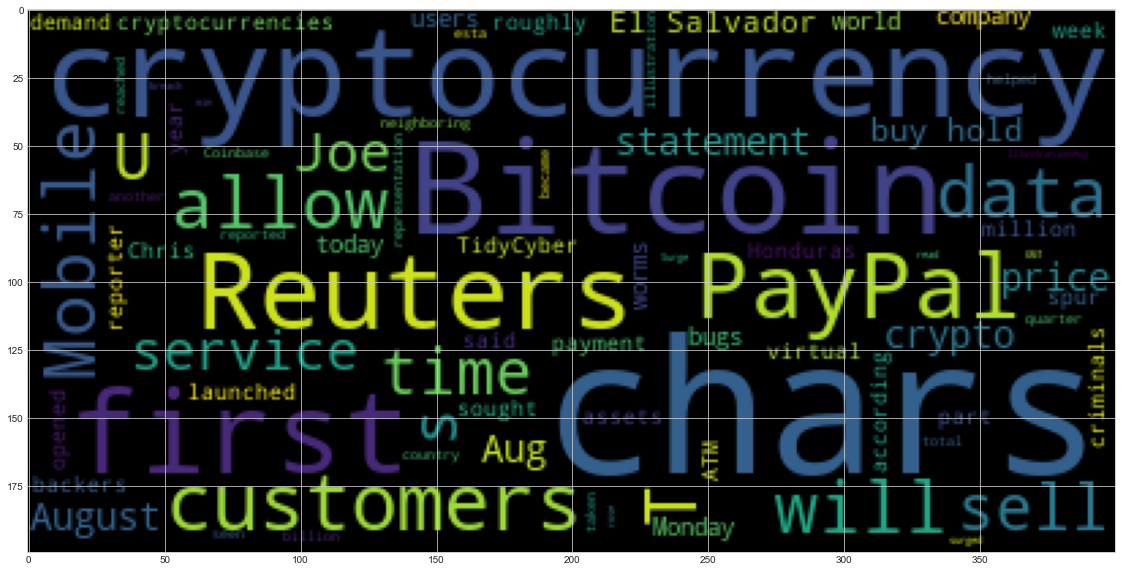

In [57]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(bitcoin_text)
plt.imshow(wc)

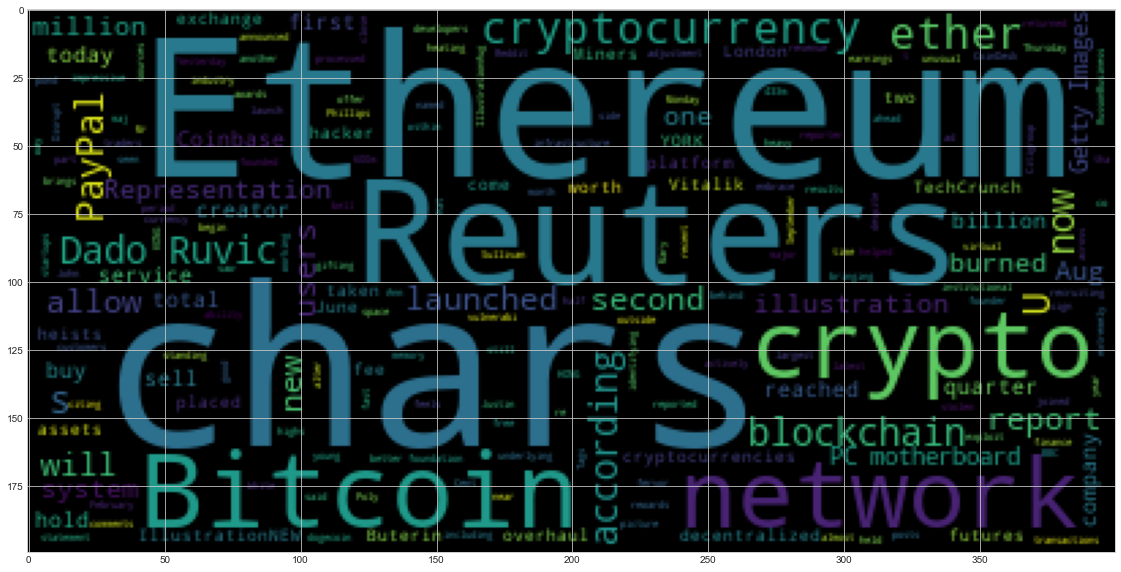

In [58]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(ethereum_text)
plt.imshow(wc)

In [59]:
import spacy
from spacy import displacy

In [61]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [60]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

In [62]:

# Concatenate all of the bitcoin text together
bitcoin_text = ' '.join(bitcoin_df.text)
bitcoin_text

'When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars] PayPal will now allow users outside the U.S. to buy, hold and sell cryptocurrency for the first time. The company announced today the launch of a new service that will allow customers in the U.K. to … [+4420 chars] Photo by Joe Raedle/Getty Images\r\n\n \n\n Twitter and Square CEO Jack Dorsey, a noted superfan of Bitcoin, claimed on Monday that the cryptocurrency will eventually unite the world. Yes, really.\nOn Mond… [+2119 chars] Retailers are increasingly accepting cryptocurrency for physical items, but did you know\xa0you can spend crypto on ephemeral experiences like travel too? As more cryptocurrency holders indicate a willi… [+2783 chars] PayPal is bringing the ability to buy, hold and sell cryptocurrencies across to the other side of the pond, the better part of a y

In [63]:
# Run the NER processor on all of the text
btc_doc = nlp(bitcoin_text)

# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin NER"

In [64]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [65]:
# List all Entities
for ent in btc_doc.ents:
    print(ent.text + ' ' + ent.label_)

U.S. GPE
first ORDINAL
today DATE
U.K. GPE
Joe Raedle PERSON
Twitter PRODUCT
Square PRODUCT
Jack Dorsey PERSON
Monday DATE
a year DATE
US GPE
Joe TidyCyber PERSON
Chris PERSON
almost 2,500 CARDINAL
2,100 MONEY
Chris PERSON
Joe TidyCyber PERSON
UK GPE
first ORDINAL
four CARDINAL
T-Mobile ORG
two years DATE
roughly 49 million CARDINAL
Reuters ORG
first ORDINAL
ATM ORG
Honduras GPE
this week DATE
El Salvador GPE
first ORDINAL
today DATE
Coinbase PERSON
its second quarter DATE
the quarter DATE
Coinbase ORG
$2.23 billion MONEY
Reuters ORG
first ORDINAL
ATM ORG
Honduras GPE
this week DATE
El Salvador GPE
first ORDINAL
first ORDINAL
$311 billion MONEY
Q2 2021 DATE
Insider Intellige PERSON
August 6, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationAug PERSON
20 CARDINAL
Reuters ORG
5.01 % PERCENT
49,106.4 MONEY
22:04 GMT TIME
Friday DATE
Motherboard PERSON
August DATE
20, 2021 DATE
PennyStocksBitcoin Price Surge Helped Boost ORG
Bitcoin, Dogecoin ORG
Ethereum GPE
T-Mobile ORG
Roughly 47.8 million 

In [66]:
# Concatenate all of the ethereum text together
ethereum_text = ' '.join(ethereum_df.text)
ethereum_text

"Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the crypto s… [+2468 chars] Cent was founded in 2017 as an ad-free creator network that allows users to offer each other crypto rewards for good posts and comments — it’s like gifting awards on Reddit, but with Ethereum. But in… [+6228 chars] PayPal will now allow users outside the U.S. to buy, hold and sell cryptocurrency for the first time. The company announced today the launch of a new service that will allow customers in the U.K. to … [+4420 chars] After the bell today, Coinbase reported another period of impressive results in its second quarter earnings report.\r\nDuring the quarter, Coinbase’s total revenue reached $2.23 billion, which helped t… [+4900 chars] PayPal is bringing the ability to buy, hold and sell cryptocurrencies across to the other side of the pond, the better part of a year aft

In [69]:
# Run the NER processor on all of the text
eth_doc = nlp(ethereum_text)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [71]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [72]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text + ' ' + ent.label_)

2017 DATE
Reddit NORP
Ethereum PERSON
U.S. GPE
first ORDINAL
today DATE
U.K. GPE
today DATE
Coinbase PERSON
its second quarter DATE
the quarter DATE
Coinbase ORG
$2.23 billion MONEY
a year DATE
US GPE
Ethereum PERSON
February 3, 2018 DATE
REUTERS ORG
Dado Ruvic PERSON
Aug 5 DATE
Reuters ORG
One CARDINAL
Monday DATE
Poly Network ORG
White PERSON
HONG KONG GPE
Aug 5 DATE
Reuters ORG
two-month DATE
Thursday DATE
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationAug 3 PERSON
Reuters ORG
Ethereum PERSON
Vitalik Buterin PERSON
TechCrunch Disrupt London 2015 ORG
John Phillips PERSON
Vitalik Buterin PERSON
Justin Sullivan PERSON
Getty Images
Citigroup ORG
CoinDesk PRODUCT
two CARDINAL
one CARDINAL
BBC News ORG
almost half CARDINAL
$600m MONEY
433 MONEY
Yesterday DATE
LONDON GPE
Aug 25 DATE
Reuters ORG
September DATE
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
July 30 DATE
Reuters ORG
second ORDINAL
first ORDINAL
$311 billion MONEY
Q2 2021 DATE
Insider I